In [1]:
from geosnap import DataStore

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/_data.py:66: UserWarning: The geosnap data storage class is provided for convenience only. The geosnap developers make no promises regarding data quality, consistency, or availability, nor are they responsible for any use/misuse of the data. The end-user is responsible for any and all analyses or applications created with the package.
  warn(


In [5]:
# if you need networks you can use 

#import quilt3 as q3
#b = q3.Bucket("s3://spatial-ucr")
#b.fetch("osm/metro_networks_8k/", "./metro_networks_8k")

Note there's a small tweak i need to make here to get use to a causal analysis. In the current setup, we're doing a blind comparison between network-based measures and euclidean measures. But that's technically making two changes:

- we're attaching each blockgroup centroid to the nearest node in the network
- we're using network distance instead of euclidean distance to create the weights between observations

To make sure this is a 1:1 comparison, we need to calculate the euclidean measure using *the exact same input data*, i.e. we need to calculate the euclidean measure based on centroids that have already been moved to intersections. After that, we can use a causal interpretation of the network metrics on the 

In [2]:
#store_acs(years=2018

In [2]:
import geopandas as gpd

In [3]:
datasets = DataStore()

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/_data.py:66: UserWarning: The geosnap data storage class is provided for convenience only. The geosnap developers make no promises regarding data quality, consistency, or availability, nor are they responsible for any use/misuse of the data. The end-user is responsible for any and all analyses or applications created with the package.
  warn(


In [4]:
from geosnap.io import get_acs

## Example

In [ ]:
# west rural
rside = get_acs(datasets, years=[2017], level="bg", msa_fips="40140")
rside = rside.to_crs(5070)

# west urban
sd = get_acs(datasets, years=[2017], level="bg", msa_fips="41740")
sd = sd.to_crs(5070)

# east urban
dc = get_acs(datasets, years=[2017], level="bg", msa_fips="47900")
dc = dc.to_crs(5070)

<AxesSubplot:>

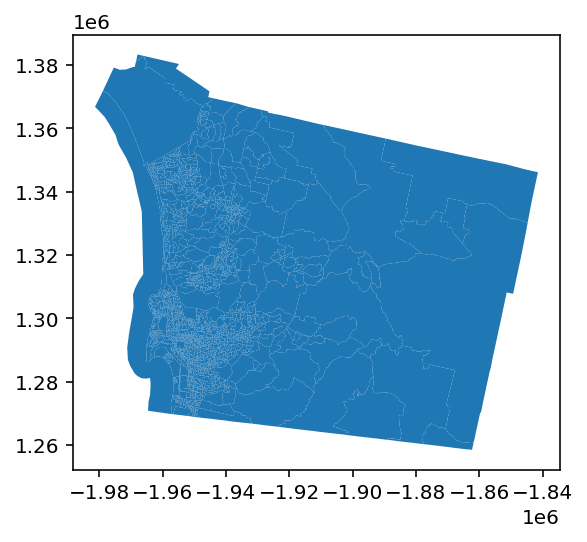

In [7]:
sd.plot()

In [5]:
import pandana as pdna
from segregation.multigroup import MultiInfoTheory
from segregation.inference import TwoValueTest

In [15]:
sd_net = pdna.Network.from_hdf5("../../geosnap_data/metro_networks_8k/41740.h5")
rside_net = pdna.Network.from_hdf5("../../geosnap_data/metro_networks_8k/40140.h5")
dc_net = pdna.Network.from_hdf5("../../geosnap_data/metro_networks_8k/47900.h5")

Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 332554
Setting CH edge vector of size 522484
Range graph removed 143094 edges of 1044968
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


KeyboardInterrupt: 

In [10]:
sd_crow = MultiInfoTheory(
    sd,
    groups=[
        "n_nonhisp_white_persons",
        "n_nonhisp_black_persons",
        "n_hispanic_persons",
        "n_asian_persons",
    ],
    distance=1600, # distance in meters
)

In [11]:
sd_netseg = MultiInfoTheory(
    sd.to_crs(4326),
    groups=[
        "n_nonhisp_white_persons",
        "n_nonhisp_black_persons",
        "n_hispanic_persons",
        "n_asian_persons",
    ],
    distance=20,  # distance in travel time (minutes)
    network=sd_net,
)

/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


In [12]:
sd_netseg.statistic

0.24955296563848176

In [13]:
sd_crow.statistic

0.18829070275856635

In [14]:
rside_crow = MultiInfoTheory(
    rside,
    groups=[
        "n_nonhisp_white_persons",
        "n_nonhisp_black_persons",
        "n_hispanic_persons",
        "n_asian_persons",
    ],
    distance=1600,
)

In [15]:
rside_ = MultiInfoTheory(
    rside.to_crs(4326),
    groups=[
        "n_nonhisp_white_persons",
        "n_nonhisp_black_persons",
        "n_hispanic_persons",
        "n_asian_persons",
    ],
    distance=20,
    network=rside_net,
)

/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


In [16]:
rside_crow.statistic

0.1446703497092326

In [17]:
rside_.statistic

0.1974723947936508

In [18]:
dc_crow = MultiInfoTheory(
    dc,
    groups=[
        "n_nonhisp_white_persons",
        "n_nonhisp_black_persons",
        "n_hispanic_persons",
        "n_asian_persons",
    ],
    distance=1600,
)

In [19]:
dc_netseg = MultiInfoTheory(
    dc.to_crs(4326),
    groups=[
        "n_nonhisp_white_persons",
        "n_nonhisp_black_persons",
        "n_hispanic_persons",
        "n_asian_persons",
    ],
    distance=20,
    network=dc_net,
)

/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


we cant use the bootstrap test because pandana networks cant be pickled... need to be un-parallelled?

In [21]:
dc_test = TwoValueTest(
    dc_crow,
    dc_netseg,
)

  0%|          | 0/500 [00:00<?, ?it/s]

In [22]:
sd_test = TwoValueTest(
    sd_crow,
    sd_netseg,
)

  0%|          | 0/500 [00:00<?, ?it/s]

In [23]:
rside_test = TwoValueTest(
    rside_crow,
    rside_,
)

  0%|          | 0/500 [00:00<?, ?it/s]

<AxesSubplot:title={'center':'MultiInfoTheory (Diff. value = -0.061)'}, ylabel='Count'>

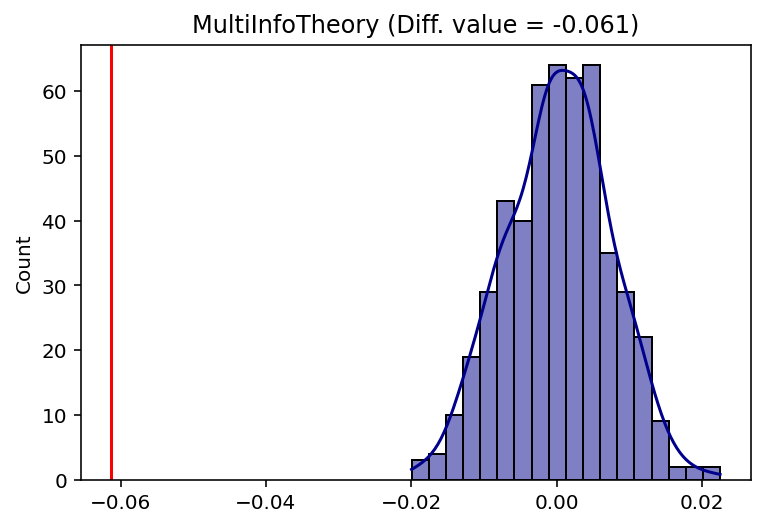

In [24]:
sd_test.plot()

<AxesSubplot:title={'center':'MultiInfoTheory (Diff. value = -0.053)'}, ylabel='Count'>

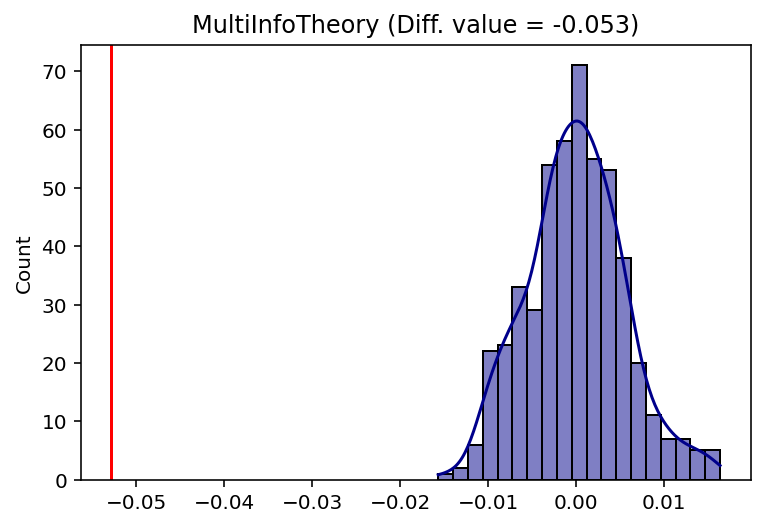

In [25]:
rside_test.plot()

<AxesSubplot:title={'center':'MultiInfoTheory (Diff. value = -0.082)'}, ylabel='Count'>

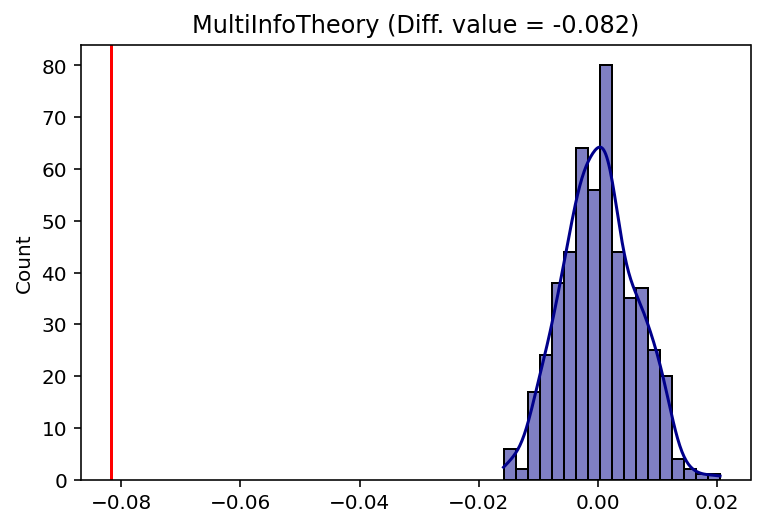

In [26]:
dc_test.plot()

## Batch for all metros in the country

In [6]:
metros = datasets.msas()[datasets.msas()['type']=='Metro Area']

In [7]:
metros

geoid                               name        type  \
283  10180                        Abilene, TX  Metro Area   
286  10380              Aguadilla-Isabela, PR  Metro Area   
287  10420                          Akron, OH  Metro Area   
289  10500                         Albany, GA  Metro Area   
290  10540                 Albany-Lebanon, OR  Metro Area   
..     ...                                ...         ...   
333  49500                          Yauco, PR  Metro Area   
334  49620                   York-Hanover, PA  Metro Area   
335  49660  Youngstown-Warren-Boardman, OH-PA  Metro Area   
336  49700                      Yuba City, CA  Metro Area   
337  49740                           Yuma, AZ  Metro Area   

                                              geometry  
283  POLYGON ((-100.14654 32.52279, -100.14642 32.5...  
286  POLYGON ((-67.20794 18.44228, -67.20844 18.443...  
287  POLYGON ((-81.39169 41.34827, -81.39164 41.348...  
289  POLYGON ((-84.45040 31.62187, -84.45045 31.621...  
290  POLYGON ((-123.25099 44.55198, -123.25240 44.5...  
..                                                 ...  
333  POLYGON ((-66.88465 18.02482, -66.88470 18.025...  
334  POLYGON ((-77.05440 40.02321, -77.05441 40.023...  
335  POLYGON ((-81.00229 41.13419, -81.00232 41.145...  
336  POLYGON ((-121.62376 39.29562, -121.62339 39.2...  
337  POLYGON ((-114.79193 32.56682, -114.79186 32.5...  

[392 rows x 4 columns]

In [8]:
from tqdm.auto import tqdm
import pandas as pd

In [9]:
from segregation.network import project_network

In [ ]:
from geosnap.io import get_acs

In [16]:
groups=[
    "n_nonhisp_white_persons",
    "n_nonhisp_black_persons",
    "n_hispanic_persons",
    "n_asian_persons",
                    ]

In [15]:
ids = []
name = []
planar_measure = []
network_measure = []
difference = []
pval = []

with tqdm(range(metros.shape[0])) as pbar:
    for metro in metros.geoid.values.tolist():
        try:
            df = get_acs(datasets, years=[2018], msa_fips=metro).to_crs(5070)
            pdna_network = pdna.Network.from_hdf5(f"~/Dropbox/projects/geosnap_data/metro_networks_8k/{metro}.h5")
            
            crow = MultiInfoTheory(df.copy(),groups=groups,
                distance=1600) # distance in length (meters)
            
            net_measure = MultiInfoTheory(
                        df.copy().to_crs(4326),
                        groups = groups,
                        distance=1600, 
                        # avg 1 mile walk time is 15-22 mins <https://jamanetwork.com/journals/jamanetworkopen/fullarticle/2752818>
                        network=pdna_network)
            
            test = TwoValueTest(crow, net_measure, iterations_under_null=10000, backend='loky', n_jobs=-1)
            
            ids.append(metro)
            name.append(metros[metros.geoid==metro].name.values[0])
            planar_measure.append(crow.statistic)
            network_measure.append(net_measure.statistic)
            difference.append(net_measure.statistic - crow.statistic)
            
            # there's a mem leak somewhere, (I think too many networks instantiated) so write the csv out on each loop

            pval.append(test.p_value)
            pbar.set_description(f"{metros[metros.geoid==metro].name.values[0]}: network: {round(net_measure.statistic,3)} planar: {round(crow.statistic,3)}")

        except Exception as e:
            print(f"{metro} failed with {e}")
        pbar.update(1)
        results = pd.DataFrame.from_dict({"fips":ids,"name": name, "planar_measure":planar_measure, "network_measure":network_measure, "seg_difference": difference, "p_value": pval})
        results.to_csv("../data/network_comparison.csv")


  0%|          | 0/392 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 31419
Setting CH edge vector of size 48344
Range graph removed 8376 edges of 96688
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

10380 failed with geosnap does not yet include built-in data for Puerto Rico


/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 93473
Setting CH edge vector of size 147032
Range graph removed 39266 edges of 294064
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 27248
Setting CH edge vector of size 42041
Range graph removed 8306 edges of 84082
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 34228
Setting CH edge vector of size 49062
Range graph removed 10252 edges of 98124
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 108193
Setting CH edge vector of size 165589
Range graph removed 46434 edges of 331178
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 142801
Setting CH edge vector of size 219956
Range graph removed 52292 edges of 439912
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 23189
Setting CH edge vector of size 33087
Range graph removed 6238 edges of 66174
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 146938
Setting CH edge vector of size 232194
Range graph removed 64914 edges of 464388
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 23378
Setting CH edge vector of size 34080
Range graph removed 6602 edges of 68160
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 44420
Setting CH edge vector of size 70833
Range graph removed 8978 edges of 141666
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 19532
Setting CH edge vector of size 31153
Range graph removed 9740 edges of 62306
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 32616
Setting CH edge vector of size 49575
Range graph removed 12504 edges of 99150
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 108110
Setting CH edge vector of size 164545
Range graph removed 35220 edges of 329090
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 24788
Setting CH edge vector of size 37217
Range graph removed 8502 edges of 74434
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 75261
Setting CH edge vector of size 118835
Range graph removed 26124 edges of 237670
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

11640 failed with geosnap does not yet include built-in data for Puerto Rico


/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 78087
Setting CH edge vector of size 104129
Range graph removed 25612 edges of 208258
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 33997
Setting CH edge vector of size 50289
Range graph removed 12996 edges of 100578
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 574856
Setting CH edge vector of size 845552
Range graph removed 194516 edges of 1691104
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 46320
Setting CH edge vector of size 78262
Range graph removed 24924 edges of 156524
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 29911
Setting CH edge vector of size 45763
Range graph removed 11644 edges of 91526
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 89193
Setting CH edge vector of size 137096
Range graph removed 37002 edges of 274192
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 199074
Setting CH edge vector of size 307046
Range graph removed 79334 edges of 614092
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 79111
Setting CH edge vector of size 123041
Range graph removed 22020 edges of 246082
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 694573
Setting CH edge vector of size 1106629
Range graph removed 340606 edges of 2213258
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 31778
Setting CH edge vector of size 45193
Range graph removed 13974 edges of 90386
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 66614
Setting CH edge vector of size 103660
Range graph removed 32704 edges of 207320
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 63824
Setting CH edge vector of size 93005
Range graph removed 18838 edges of 186010
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 14518
Setting CH edge vector of size 22374
Range graph removed 3498 edges of 44748
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 28308
Setting CH edge vector of size 43730
Range graph removed 6776 edges of 87460
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 57346
Setting CH edge vector of size 81917
Range graph removed 12690 edges of 163834
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 26517
Setting CH edge vector of size 35956
Range graph removed 8126 edges of 71912
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 50192
Setting CH edge vector of size 76531
Range graph removed 20448 edges of 153062
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 49565
Setting CH edge vector of size 78107
Range graph removed 20972 edges of 156214
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 41560
Setting CH edge vector of size 62073
Range graph removed 13734 edges of 124146
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 31050
Setting CH edge vector of size 46047
Range graph removed 10588 edges of 92094
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 167543
Setting CH edge vector of size 249703
Range graph removed 59172 edges of 499406
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 53021
Setting CH edge vector of size 81429
Range graph removed 22858 edges of 162858
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 65104
Setting CH edge vector of size 87149
Range graph removed 19214 edges of 174298
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 28604
Setting CH edge vector of size 44246
Range graph removed 7676 edges of 88492
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 30142
Setting CH edge vector of size 45492
Range graph removed 12672 edges of 90984
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 34736
Setting CH edge vector of size 51523
Range graph removed 9852 edges of 103046
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 130475
Setting CH edge vector of size 207128
Range graph removed 66740 edges of 414256
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 660498
Setting CH edge vector of size 1044784
Range graph removed 324582 edges of 2089568
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 107215
Setting CH edge vector of size 175698
Range graph removed 57286 edges of 351396
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 29258
Setting CH edge vector of size 41371
Range graph removed 9798 edges of 82742
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 98379
Setting CH edge vector of size 146137
Range graph removed 28684 edges of 292274
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 137804
Setting CH edge vector of size 214952
Range graph removed 58488 edges of 429904
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 39479
Setting CH edge vector of size 63605
Range graph removed 9896 edges of 127210
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 26573
Setting CH edge vector of size 39728
Range graph removed 7624 edges of 79456
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 110489
Setting CH edge vector of size 179087
Range graph removed 43784 edges of 358174
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 14900
Setting CH edge vector of size 21583
Range graph removed 5016 edges of 43166
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 41227
Setting CH edge vector of size 62449
Range graph removed 20842 edges of 124898
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 37387
Setting CH edge vector of size 54668
Range graph removed 20294 edges of 109336
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 54058
Setting CH edge vector of size 81391
Range graph removed 12024 edges of 162782
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 88872
Setting CH edge vector of size 137393
Range graph removed 32036 edges of 274786
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 25414
Setting CH edge vector of size 36574
Range graph removed 9722 edges of 73148
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 25149
Setting CH edge vector of size 36893
Range graph removed 6754 edges of 73786
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 9630
Setting CH edge vector of size 14563
Range graph removed 2976 edges of 29126
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 16499
Setting CH edge vector of size 25516
Range graph removed 4528 edges of 51032
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 44060
Setting CH edge vector of size 67607
Range graph removed 22374 edges of 135214
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 28142
Setting CH edge vector of size 41788
Range graph removed 11768 edges of 83576
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 53933
Setting CH edge vector of size 86380
Range graph removed 16620 edges of 172760
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 48308
Setting CH edge vector of size 67078
Range graph removed 15498 edges of 134156
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 72684
Setting CH edge vector of size 112298
Range graph removed 33364 edges of 224596
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 258243
Setting CH edge vector of size 382992
Range graph removed 102528 edges of 765984
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 128965
Setting CH edge vector of size 170392
Range graph removed 38572 edges of 340784
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 71154
Setting CH edge vector of size 102000
Range graph removed 25988 edges of 204000
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 13139
Setting CH edge vector of size 22290
Range graph removed 8150 edges of 44580
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 749093
Setting CH edge vector of size 1235156
Range graph removed 311884 edges of 2470312
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 25239
Setting CH edge vector of size 38552
Range graph removed 12178 edges of 77104
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 266382
Setting CH edge vector of size 400213
Range graph removed 95682 edges of 800426
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 45140
Setting CH edge vector of size 66902
Range graph removed 19420 edges of 133804
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 23728
Setting CH edge vector of size 32183
Range graph removed 7244 edges of 64366
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 180525
Setting CH edge vector of size 282342
Range graph removed 73744 edges of 564684
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 19306
Setting CH edge vector of size 28349
Range graph removed 5412 edges of 56698
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 39721
Setting CH edge vector of size 58998
Range graph removed 13384 edges of 117996
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 83067
Setting CH edge vector of size 129831
Range graph removed 32868 edges of 259662
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 27751
Setting CH edge vector of size 41531
Range graph removed 10956 edges of 83062
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 154084
Setting CH edge vector of size 239748
Range graph removed 71544 edges of 479496
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 46125
Setting CH edge vector of size 69896
Range graph removed 17404 edges of 139792
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 19136
Setting CH edge vector of size 29632
Range graph removed 8344 edges of 59264
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 237754
Setting CH edge vector of size 373721
Range graph removed 95258 edges of 747442
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 35009
Setting CH edge vector of size 54465
Range graph removed 9740 edges of 108930
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 20471
Setting CH edge vector of size 29888
Range graph removed 6296 edges of 59776
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 48650
Setting CH edge vector of size 77485
Range graph removed 18696 edges of 154970
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 35701
Setting CH edge vector of size 49810
Range graph removed 12680 edges of 99620
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 580271
Setting CH edge vector of size 919967
Range graph removed 208062 edges of 1839934
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 22777
Setting CH edge vector of size 35407
Range graph removed 13910 edges of 70814
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 13103
Setting CH edge vector of size 20345
Range graph removed 3636 edges of 40690
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 58280
Setting CH edge vector of size 88981
Range graph removed 25838 edges of 177962
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 53232
Setting CH edge vector of size 83528
Range graph removed 19400 edges of 167056
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


19430 failed with 'No object named nodes in the file'


/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 64246
Setting CH edge vector of size 101342
Range graph removed 31348 edges of 202684
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 17753
Setting CH edge vector of size 34246
Range graph removed 17794 edges of 68492
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 154213
Setting CH edge vector of size 246521
Range graph removed 64406 edges of 493042
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 557512
Setting CH edge vector of size 901015
Range graph removed 233814 edges of 1802030
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 92012
Setting CH edge vector of size 145725
Range graph removed 35092 edges of 291450
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 532095
Setting CH edge vector of size 842572
Range graph removed 167890 edges of 1685144
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 37141
Setting CH edge vector of size 56584
Range graph removed 14066 edges of 113168
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 25802
Setting CH edge vector of size 40902
Range graph removed 13024 edges of 81804
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 15480
Setting CH edge vector of size 23777
Range graph removed 6126 edges of 47554
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 51363
Setting CH edge vector of size 75701
Range graph removed 13958 edges of 151402
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 222598
Setting CH edge vector of size 337428
Range graph removed 77394 edges of 674856
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 34424
Setting CH edge vector of size 54491
Range graph removed 19324 edges of 108982
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 24283
Setting CH edge vector of size 37467
Range graph removed 5966 edges of 74934
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 54884
Setting CH edge vector of size 87111
Range graph removed 9506 edges of 174222
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 102833
Setting CH edge vector of size 168270
Range graph removed 24320 edges of 336540
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 65884
Setting CH edge vector of size 98377
Range graph removed 22700 edges of 196754
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 27064
Setting CH edge vector of size 44647
Range graph removed 12784 edges of 89294
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 12054
Setting CH edge vector of size 18935
Range graph removed 4752 edges of 37870
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 11615
Setting CH edge vector of size 17872
Range graph removed 3994 edges of 35744
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 18406
Setting CH edge vector of size 27934
Range graph removed 4850 edges of 55868
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 56127
Setting CH edge vector of size 79230
Range graph removed 16620 edges of 158460
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 45939
Setting CH edge vector of size 68010
Range graph removed 14352 edges of 136020
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 9848
Setting CH edge vector of size 15190
Range graph removed 4430 edges of 30380
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 37839
Setting CH edge vector of size 62937
Range graph removed 19306 edges of 125874
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 38739
Setting CH edge vector of size 59085
Range graph removed 15102 edges of 118170
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 44670
Setting CH edge vector of size 68785
Range graph removed 19066 edges of 137570
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 74331
Setting CH edge vector of size 109612
Range graph removed 34804 edges of 219224
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 85354
Setting CH edge vector of size 129571
Range graph removed 32142 edges of 259142
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 31006
Setting CH edge vector of size 47637
Range graph removed 10054 edges of 95274
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 34916
Setting CH edge vector of size 52542
Range graph removed 12238 edges of 105084
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 26854
Setting CH edge vector of size 40637
Range graph removed 10158 edges of 81274
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 20180
Setting CH edge vector of size 32058
Range graph removed 6540 edges of 64116
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 63710
Setting CH edge vector of size 101591
Range graph removed 33578 edges of 203182
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 53188
Setting CH edge vector of size 75615
Range graph removed 19962 edges of 151230
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 74274
Setting CH edge vector of size 116778
Range graph removed 25912 edges of 233556
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 132952
Setting CH edge vector of size 201916
Range graph removed 34392 edges of 403832
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 18874
Setting CH edge vector of size 27455
Range graph removed 5972 edges of 54910
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 50347
Setting CH edge vector of size 75655
Range graph removed 12634 edges of 151310
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 46407
Setting CH edge vector of size 70304
Range graph removed 18310 edges of 140608
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 30759
Setting CH edge vector of size 45391
Range graph removed 12320 edges of 90782
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 38535
Setting CH edge vector of size 57016
Range graph removed 16682 edges of 114032
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 16046
Setting CH edge vector of size 23137
Range graph removed 4492 edges of 46274
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 40151
Setting CH edge vector of size 63500
Range graph removed 14340 edges of 127000
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 31671
Setting CH edge vector of size 53698
Range graph removed 21944 edges of 107396
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 35206
Setting CH edge vector of size 53721
Range graph removed 10880 edges of 107442
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 123668
Setting CH edge vector of size 191728
Range graph removed 38286 edges of 383456
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 13121
Setting CH edge vector of size 16528
Range graph removed 3356 edges of 33056
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 14018
Setting CH edge vector of size 21508
Range graph removed 4818 edges of 43016
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 115549
Setting CH edge vector of size 185771
Range graph removed 51598 edges of 371542
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 119587
Setting CH edge vector of size 184369
Range graph removed 56454 edges of 368738
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 67031
Setting CH edge vector of size 100197
Range graph removed 24940 edges of 200394
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 22320
Setting CH edge vector of size 33168
Range graph removed 6636 edges of 66336
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 157973
Setting CH edge vector of size 239480
Range graph removed 70266 edges of 478960
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

25020 failed with geosnap does not yet include built-in data for Puerto Rico


/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 43596
Setting CH edge vector of size 68309
Range graph removed 22650 edges of 136618
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 72362
Setting CH edge vector of size 105916
Range graph removed 29202 edges of 211832
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 20663
Setting CH edge vector of size 29614
Range graph removed 7862 edges of 59228
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 20369
Setting CH edge vector of size 32083
Range graph removed 5502 edges of 64166
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 123889
Setting CH edge vector of size 187640
Range graph removed 46916 edges of 375280
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 42344
Setting CH edge vector of size 56563
Range graph removed 13466 edges of 113126
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 172185
Setting CH edge vector of size 301602
Range graph removed 138818 edges of 603204
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 20104
Setting CH edge vector of size 29514
Range graph removed 6856 edges of 59028
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 58829
Setting CH edge vector of size 82220
Range graph removed 21364 edges of 164440
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 43288
Setting CH edge vector of size 68946
Range graph removed 21234 edges of 137892
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 36300
Setting CH edge vector of size 57261
Range graph removed 14706 edges of 114522
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 26491
Setting CH edge vector of size 40264
Range graph removed 6874 edges of 80528
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 16086
Setting CH edge vector of size 25053
Range graph removed 10180 edges of 50106
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 45808
Setting CH edge vector of size 71984
Range graph removed 9056 edges of 143968
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 553275
Setting CH edge vector of size 863058
Range graph removed 203196 edges of 1726116
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 78324
Setting CH edge vector of size 117445
Range graph removed 38156 edges of 234890
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 71784
Setting CH edge vector of size 113113
Range graph removed 38642 edges of 226226
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 47719
Setting CH edge vector of size 76130
Range graph removed 27958 edges of 152260
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 280305
Setting CH edge vector of size 445148
Range graph removed 120306 edges of 890296
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 23117
Setting CH edge vector of size 36102
Range graph removed 10310 edges of 72204
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 15570
Setting CH edge vector of size 22562
Range graph removed 4232 edges of 45124
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 16822
Setting CH edge vector of size 25363
Range graph removed 4328 edges of 50726
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 52829
Setting CH edge vector of size 79675
Range graph removed 20876 edges of 159350
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 25212
Setting CH edge vector of size 36896
Range graph removed 7700 edges of 73792
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 172325
Setting CH edge vector of size 270867
Range graph removed 68800 edges of 541734
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 17256
Setting CH edge vector of size 25101
Range graph removed 6596 edges of 50202
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 25747
Setting CH edge vector of size 40186
Range graph removed 9464 edges of 80372
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 46489
Setting CH edge vector of size 67533
Range graph removed 17762 edges of 135066
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 38111
Setting CH edge vector of size 53945
Range graph removed 12712 edges of 107890
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 32654
Setting CH edge vector of size 48451
Range graph removed 8660 edges of 96902
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 15537
Setting CH edge vector of size 22369
Range graph removed 3512 edges of 44738
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 30259
Setting CH edge vector of size 46361
Range graph removed 13374 edges of 92722
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 9716
Setting CH edge vector of size 14555
Range graph removed 4400 edges of 29110
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 35416
Setting CH edge vector of size 54789
Range graph removed 12558 edges of 109578
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 15529
Setting CH edge vector of size 24145
Range graph removed 4410 edges of 48290
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 345009
Setting CH edge vector of size 538649
Range graph removed 133138 edges of 1077298
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 37946
Setting CH edge vector of size 57466
Range graph removed 9262 edges of 114932
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 62841
Setting CH edge vector of size 96771
Range graph removed 21662 edges of 193542
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 94616
Setting CH edge vector of size 127598
Range graph removed 27504 edges of 255196
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 56530
Setting CH edge vector of size 83513
Range graph removed 24830 edges of 167026
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 110491
Setting CH edge vector of size 158934
Range graph removed 43562 edges of 317868
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 9494
Setting CH edge vector of size 15353
Range graph removed 3502 edges of 30706
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 29923
Setting CH edge vector of size 48110
Range graph removed 12284 edges of 96220
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 64147
Setting CH edge vector of size 97586
Range graph removed 18274 edges of 195172
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 33939
Setting CH edge vector of size 54843
Range graph removed 14898 edges of 109686
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 30936
Setting CH edge vector of size 45118
Range graph removed 5972 edges of 90236
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 59485
Setting CH edge vector of size 91165
Range graph removed 19988 edges of 182330
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 139136
Setting CH edge vector of size 234625
Range graph removed 69094 edges of 469250
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 110855
Setting CH edge vector of size 171443
Range graph removed 42222 edges of 342886
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 48780
Setting CH edge vector of size 77898
Range graph removed 16518 edges of 155796
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 33624
Setting CH edge vector of size 54842
Range graph removed 7814 edges of 109684
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 66745
Setting CH edge vector of size 109657
Range graph removed 19880 edges of 219314
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 208951
Setting CH edge vector of size 335988
Range graph removed 82570 edges of 671976
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 24096
Setting CH edge vector of size 39528
Range graph removed 11454 edges of 79056
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 22900
Setting CH edge vector of size 36322
Range graph removed 10400 edges of 72644
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 34254
Setting CH edge vector of size 52876
Range graph removed 11776 edges of 105752
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 11724
Setting CH edge vector of size 17341
Range graph removed 4720 edges of 34682
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 20066
Setting CH edge vector of size 27859
Range graph removed 7186 edges of 55718
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 59321
Setting CH edge vector of size 89697
Range graph removed 20824 edges of 179394
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 19593
Setting CH edge vector of size 31230
Range graph removed 9276 edges of 62460
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 48981
Setting CH edge vector of size 78989
Range graph removed 17070 edges of 157978
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 119110
Setting CH edge vector of size 185812
Range graph removed 58432 edges of 371624
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 35899
Setting CH edge vector of size 56467
Range graph removed 16774 edges of 112934
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 43130
Setting CH edge vector of size 64605
Range graph removed 16238 edges of 129210
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 26886
Setting CH edge vector of size 38269
Range graph removed 9194 edges of 76538
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 734018
Setting CH edge vector of size 1133541
Range graph removed 247594 edges of 2267082
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 116052
Setting CH edge vector of size 172647
Range graph removed 46444 edges of 345294
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 43476
Setting CH edge vector of size 72110
Range graph removed 13180 edges of 144220
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 113049
Setting CH edge vector of size 148475
Range graph removed 37548 edges of 296950
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 45090
Setting CH edge vector of size 67769
Range graph removed 16226 edges of 135538
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 64688
Setting CH edge vector of size 96189
Range graph removed 15746 edges of 192378
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 160987
Setting CH edge vector of size 251402
Range graph removed 51648 edges of 502804
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 86997
Setting CH edge vector of size 136660
Range graph removed 44600 edges of 273320
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 32627
Setting CH edge vector of size 51268
Range graph removed 15202 edges of 102536
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 25283
Setting CH edge vector of size 39184
Range graph removed 6578 edges of 78368
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 26102
Setting CH edge vector of size 40871
Range graph removed 13672 edges of 81742
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

32420 failed with geosnap does not yet include built-in data for Puerto Rico


/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 61184
Setting CH edge vector of size 95629
Range graph removed 11250 edges of 191258
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 27566
Setting CH edge vector of size 39166
Range graph removed 9300 edges of 78332
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 119730
Setting CH edge vector of size 183329
Range graph removed 46542 edges of 366658
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 54764
Setting CH edge vector of size 83726
Range graph removed 15344 edges of 167452
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 424824
Setting CH edge vector of size 704402
Range graph removed 217714 edges of 1408804
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 15742
Setting CH edge vector of size 24252
Range graph removed 3984 edges of 48504
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 18740
Setting CH edge vector of size 28093
Range graph removed 4892 edges of 56186
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 21070
Setting CH edge vector of size 32923
Range graph removed 3558 edges of 65846
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 130398
Setting CH edge vector of size 206162
Range graph removed 41236 edges of 412324
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 429752
Setting CH edge vector of size 680113
Range graph removed 161188 edges of 1360226
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 20449
Setting CH edge vector of size 29846
Range graph removed 7486 edges of 59692
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 65665
Setting CH edge vector of size 101018
Range graph removed 35546 edges of 202036
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 91910
Setting CH edge vector of size 142607
Range graph removed 33144 edges of 285214
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 23119
Setting CH edge vector of size 33535
Range graph removed 6782 edges of 67070
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 41372
Setting CH edge vector of size 64475
Range graph removed 12154 edges of 128950
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 36283
Setting CH edge vector of size 53862
Range graph removed 15222 edges of 107724
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 34613
Setting CH edge vector of size 47449
Range graph removed 8876 edges of 94898
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 22106
Setting CH edge vector of size 30730
Range graph removed 7124 edges of 61460
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 33712
Setting CH edge vector of size 134152
Range graph removed 177854 edges of 268304
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 17801
Setting CH edge vector of size 29847
Range graph removed 8668 edges of 59694
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 23528
Setting CH edge vector of size 36306
Range graph removed 6162 edges of 72612
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 70919
Setting CH edge vector of size 111701
Range graph removed 32404 edges of 223402
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 71641
Setting CH edge vector of size 114627
Range graph removed 39870 edges of 229254
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 63431
Setting CH edge vector of size 99837
Range graph removed 28076 edges of 199674
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 171701
Setting CH edge vector of size 263600
Range graph removed 76802 edges of 527200
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 32261
Setting CH edge vector of size 46422
Range graph removed 9482 edges of 92844
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 114189
Setting CH edge vector of size 187463
Range graph removed 64320 edges of 374926
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 140301
Setting CH edge vector of size 214201
Range graph removed 44068 edges of 428402
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 1438949
Setting CH edge vector of size 2356932
Range graph removed 726304 edges of 4713864
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 26535
Setting CH edge vector of size 41285
Range graph removed 8314 edges of 82570
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 86279
Setting CH edge vector of size 139507
Range graph removed 38394 edges of 279014
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 37417
Setting CH edge vector of size 57583
Range graph removed 19008 edges of 115166
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 59250
Setting CH edge vector of size 90735
Range graph removed 17142 edges of 181470
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 25062
Setting CH edge vector of size 42109
Range graph removed 11358 edges of 84218
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 12484
Setting CH edge vector of size 19497
Range graph removed 1936 edges of 38994
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 122724
Setting CH edge vector of size 193225
Range graph removed 44058 edges of 386450
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 226815
Setting CH edge vector of size 343280
Range graph removed 90754 edges of 686560
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 109130
Setting CH edge vector of size 163272
Range graph removed 35940 edges of 326544
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 190392
Setting CH edge vector of size 303225
Range graph removed 71376 edges of 606450
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 345409
Setting CH edge vector of size 568736
Range graph removed 162306 edges of 1137472
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 33362
Setting CH edge vector of size 52028
Range graph removed 10622 edges of 104056
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 34050
Setting CH edge vector of size 49362
Range graph removed 9132 edges of 98724
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 94409
Setting CH edge vector of size 143613
Range graph removed 27456 edges of 287226
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 57717
Setting CH edge vector of size 94375
Range graph removed 26378 edges of 188750
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 27741
Setting CH edge vector of size 42492
Range graph removed 8670 edges of 84984
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 16495
Setting CH edge vector of size 22982
Range graph removed 4156 edges of 45964
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 60607
Setting CH edge vector of size 94335
Range graph removed 24442 edges of 188670
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 66233
Setting CH edge vector of size 101750
Range graph removed 16996 edges of 203500
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 689400
Setting CH edge vector of size 1115213
Range graph removed 314990 edges of 2230426
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 468834
Setting CH edge vector of size 708668
Range graph removed 133996 edges of 1417336
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 21855
Setting CH edge vector of size 31359
Range graph removed 5072 edges of 62718
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 272409
Setting CH edge vector of size 409631
Range graph removed 88312 edges of 819262
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 27020
Setting CH edge vector of size 40874
Range graph removed 13960 edges of 81748
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 16480
Setting CH edge vector of size 26278
Range graph removed 10430 edges of 52556
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

38660 failed with geosnap does not yet include built-in data for Puerto Rico


/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 48241
Setting CH edge vector of size 76940
Range graph removed 21004 edges of 153880
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 103393
Setting CH edge vector of size 152337
Range graph removed 46940 edges of 304674
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 329309
Setting CH edge vector of size 488906
Range graph removed 110518 edges of 977812
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


39100 failed with 'No object named nodes in the file'


/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


39150 failed with 'No object named nodes in the file'


/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 186936
Setting CH edge vector of size 298115
Range graph removed 93612 edges of 596230
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 126454
Setting CH edge vector of size 196521
Range graph removed 44450 edges of 393042
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 22155
Setting CH edge vector of size 34100
Range graph removed 6272 edges of 68200
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 41474
Setting CH edge vector of size 66670
Range graph removed 16842 edges of 133340
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 41748
Setting CH edge vector of size 69645
Range graph removed 17360 edges of 139290
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 268899
Setting CH edge vector of size 407418
Range graph removed 89822 edges of 814836
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 30829
Setting CH edge vector of size 46586
Range graph removed 11808 edges of 93172
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 105655
Setting CH edge vector of size 165907
Range graph removed 38860 edges of 331814
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 34724
Setting CH edge vector of size 55539
Range graph removed 24194 edges of 111078
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 59230
Setting CH edge vector of size 94132
Range graph removed 23956 edges of 188264
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 247819
Setting CH edge vector of size 353750
Range graph removed 91016 edges of 707500
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 486514
Setting CH edge vector of size 742113
Range graph removed 162416 edges of 1484226
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 96791
Setting CH edge vector of size 131184
Range graph removed 30360 edges of 262368
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 75903
Setting CH edge vector of size 119182
Range graph removed 26190 edges of 238364
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 87329
Setting CH edge vector of size 136246
Range graph removed 36464 edges of 272492
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 34847
Setting CH edge vector of size 54311
Range graph removed 9504 edges of 108622
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 33863
Setting CH edge vector of size 49884
Range graph removed 10856 edges of 99768
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 16279
Setting CH edge vector of size 24470
Range graph removed 7354 edges of 48940
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 377311
Setting CH edge vector of size 588982
Range graph removed 163420 edges of 1177964
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 34097
Setting CH edge vector of size 52889
Range graph removed 7952 edges of 105778
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 74033
Setting CH edge vector of size 106102
Range graph removed 21330 edges of 212204
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 78499
Setting CH edge vector of size 122033
Range graph removed 27274 edges of 244066
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 91699
Setting CH edge vector of size 151173
Range graph removed 66602 edges of 302346
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 192451
Setting CH edge vector of size 301752
Range graph removed 65560 edges of 603504
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 20280
Setting CH edge vector of size 31988
Range graph removed 6014 edges of 63976
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 223257
Setting CH edge vector of size 340300
Range graph removed 72492 edges of 680600
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 332554
Setting CH edge vector of size 522484
Range graph removed 143094 edges of 1044968
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 592974
Setting CH edge vector of size 931203
Range graph removed 213896 edges of 1862406
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

41900 failed with geosnap does not yet include built-in data for Puerto Rico


/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 319671
Setting CH edge vector of size 499432
Range graph removed 99450 edges of 998864
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

41980 failed with geosnap does not yet include built-in data for Puerto Rico


/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 68913
Setting CH edge vector of size 105024
Range graph removed 30690 edges of 210048
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 154499
Setting CH edge vector of size 243152
Range graph removed 43692 edges of 486304
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 33948
Setting CH edge vector of size 52796
Range graph removed 18466 edges of 105592
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 82748
Setting CH edge vector of size 127658
Range graph removed 29618 edges of 255316
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 71535
Setting CH edge vector of size 111183
Range graph removed 36914 edges of 222366
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 57533
Setting CH edge vector of size 91050
Range graph removed 26774 edges of 182100
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 75625
Setting CH edge vector of size 116259
Range graph removed 30644 edges of 232518
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 455377
Setting CH edge vector of size 678160
Range graph removed 144496 edges of 1356320
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 18667
Setting CH edge vector of size 29536
Range graph removed 6754 edges of 59072
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 14242
Setting CH edge vector of size 21545
Range graph removed 2846 edges of 43090
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 14655
Setting CH edge vector of size 23187
Range graph removed 5842 edges of 46374
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 23434
Setting CH edge vector of size 35360
Range graph removed 8212 edges of 70720
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 44728
Setting CH edge vector of size 63754
Range graph removed 12440 edges of 127508
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 31365
Setting CH edge vector of size 49419
Range graph removed 11732 edges of 98838
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 44279
Setting CH edge vector of size 69264
Range graph removed 17318 edges of 138528
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 31337
Setting CH edge vector of size 49519
Range graph removed 10938 edges of 99038
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 60382
Setting CH edge vector of size 96275
Range graph removed 18406 edges of 192550
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 74091
Setting CH edge vector of size 112621
Range graph removed 33906 edges of 225242
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 65547
Setting CH edge vector of size 97402
Range graph removed 16054 edges of 194804
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 59122
Setting CH edge vector of size 93020
Range graph removed 8734 edges of 186040
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 68922
Setting CH edge vector of size 112332
Range graph removed 38548 edges of 224664
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 77058
Setting CH edge vector of size 110526
Range graph removed 32918 edges of 221052
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 24294
Setting CH edge vector of size 37585
Range graph removed 7448 edges of 75170
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 34801
Setting CH edge vector of size 52411
Range graph removed 9192 edges of 104822
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 26456
Setting CH edge vector of size 40313
Range graph removed 9998 edges of 80626
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 34026
Setting CH edge vector of size 51539
Range graph removed 13860 edges of 103078
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 300453
Setting CH edge vector of size 457447
Range graph removed 112238 edges of 914894
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 57788
Setting CH edge vector of size 84614
Range graph removed 17500 edges of 169228
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 41585
Setting CH edge vector of size 54171
Range graph removed 10222 edges of 108342
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 79491
Setting CH edge vector of size 123073
Range graph removed 27814 edges of 246146
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 24588
Setting CH edge vector of size 37898
Range graph removed 11912 edges of 75796
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 68902
Setting CH edge vector of size 108378
Range graph removed 30184 edges of 216756
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 67301
Setting CH edge vector of size 99672
Range graph removed 19712 edges of 199344
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 212200
Setting CH edge vector of size 339665
Range graph removed 80980 edges of 679330
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 50891
Setting CH edge vector of size 78083
Range graph removed 18570 edges of 156166
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 31032
Setting CH edge vector of size 44156
Range graph removed 7862 edges of 88312
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 39658
Setting CH edge vector of size 62271
Range graph removed 17154 edges of 124542
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 105354
Setting CH edge vector of size 169087
Range graph removed 39184 edges of 338174
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 94135
Setting CH edge vector of size 150383
Range graph removed 39526 edges of 300766
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 96744
Setting CH edge vector of size 159017
Range graph removed 52856 edges of 318034
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 103610
Setting CH edge vector of size 163420
Range graph removed 39820 edges of 326840
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 197030
Setting CH edge vector of size 292982
Range graph removed 68636 edges of 585964
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 58343
Setting CH edge vector of size 88942
Range graph removed 25160 edges of 177884
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


46300 failed with 'No object named nodes in the file'


/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 28766
Setting CH edge vector of size 44027
Range graph removed 10792 edges of 88054
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 33241
Setting CH edge vector of size 51875
Range graph removed 17308 edges of 103750
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 42010
Setting CH edge vector of size 63161
Range graph removed 15764 edges of 126322
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 25755
Setting CH edge vector of size 39035
Range graph removed 7362 edges of 78070
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 112625
Setting CH edge vector of size 180234
Range graph removed 55312 edges of 360468
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 23007
Setting CH edge vector of size 33310
Range graph removed 5760 edges of 66620
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 20616
Setting CH edge vector of size 32199
Range graph removed 6448 edges of 64398
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 203159
Setting CH edge vector of size 320644
Range graph removed 100916 edges of 641288
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 38053
Setting CH edge vector of size 57183
Range graph removed 8252 edges of 114366
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 44011
Setting CH edge vector of size 67382
Range graph removed 12962 edges of 134764
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 16452
Setting CH edge vector of size 24678
Range graph removed 3806 edges of 49356
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 24353
Setting CH edge vector of size 36572
Range graph removed 8566 edges of 73144
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 943540
Setting CH edge vector of size 1466574
Range graph removed 440968 edges of 2933148
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 44260
Setting CH edge vector of size 70205
Range graph removed 23072 edges of 140410
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 26453
Setting CH edge vector of size 44630
Range graph removed 18094 edges of 89260
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 26351
Setting CH edge vector of size 41699
Range graph removed 8538 edges of 83398
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 20811
Setting CH edge vector of size 29476
Range graph removed 4910 edges of 58952
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 32317
Setting CH edge vector of size 47330
Range graph removed 11106 edges of 94660
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 24905
Setting CH edge vector of size 34993
Range graph removed 7246 edges of 69986
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 22044
Setting CH edge vector of size 34308
Range graph removed 6546 edges of 68616
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 90737
Setting CH edge vector of size 145356
Range graph removed 37460 edges of 290712
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 30233
Setting CH edge vector of size 44092
Range graph removed 9620 edges of 88184
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 37233
Setting CH edge vector of size 55975
Range graph removed 14968 edges of 111950
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 49210
Setting CH edge vector of size 67244
Range graph removed 16556 edges of 134488
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 120119
Setting CH edge vector of size 167352
Range graph removed 39346 edges of 334704
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 205178
Setting CH edge vector of size 339418
Range graph removed 134948 edges of 678836
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 28283
Setting CH edge vector of size 42597
Range graph removed 8822 edges of 85194
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

49500 failed with geosnap does not yet include built-in data for Puerto Rico


/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 124197
Setting CH edge vector of size 188699
Range graph removed 46746 edges of 377398
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 58927
Setting CH edge vector of size 89635
Range graph removed 18132 edges of 179270
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 101227
Setting CH edge vector of size 156542
Range graph removed 42928 edges of 313084
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:195: UserWarning: Currenct columns unavailable at this resolution; not adjusting for inflation
  warn(


Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 29080
Setting CH edge vector of size 47971
Range graph removed 6846 edges of 95942
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y
/Users/knaaptime/Dropbox/projects/segregation/segregation/network/network.py:150: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodataframe.centroid.x, geodataframe.centroid.y


  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
results = pd.DataFrame.from_dict({"fips":ids,"name": name, "planar_measure":planar_measure, "network_measure":network_measure, "seg_difference": difference, "p_value": pval})

In [ ]:
results.to_csv("../data/network_comparison.csv")

<AxesSubplot:>

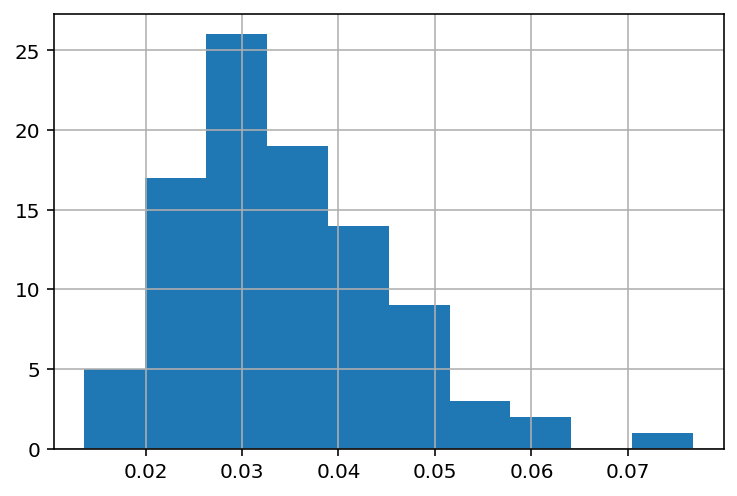

In [19]:
results[results.p_value<0.05].seg_difference.hist()

<AxesSubplot:>

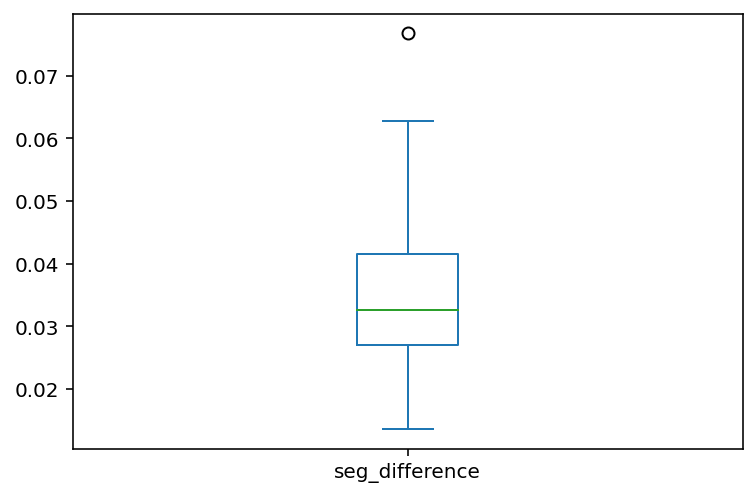

In [20]:
results[results.p_value<0.05].seg_difference.plot(kind='box')

In [41]:
results['pct_difference'] = results.seg_difference / results.planar_measure

In [28]:
results[results.p_value<0.05].sort_values('seg_difference', ascending=False)

fips                                   name  planar_measure  \
62   16620                         Charleston, WV        0.246559   
267  37900                             Peoria, IL        0.287843   
210  31140     Louisville/Jefferson County, KY-IN        0.268583   
326  44140                        Springfield, MA        0.256207   
271  38300                         Pittsburgh, PA        0.224904   
..     ...                                    ...             ...   
303  41740     San Diego-Chula Vista-Carlsbad, CA        0.184232   
209  31080     Los Angeles-Long Beach-Anaheim, CA        0.264362   
248  35620  New York-Newark-Jersey City, NY-NJ-PA        0.280074   
305  41940     San Jose-Sunnyvale-Santa Clara, CA        0.155978   
304  41860     San Francisco-Oakland-Berkeley, CA        0.153797   

     network_measure  seg_difference  p_value  
62          0.323321        0.076762   0.0238  
267         0.350702        0.062859   0.0038  
210         0.328105        0.059522   0.0002  
326         0.311835        0.055627   0.0002  
271         0.280052        0.055149   0.0000  
..               ...             ...      ...  
303         0.203667        0.019435   0.0086  
209         0.283518        0.019156   0.0000  
248         0.298945        0.018871   0.0000  
305         0.173359        0.017381   0.0188  
304         0.167445        0.013648   0.0084  

[96 rows x 6 columns]

In [1]:
results[results.seg_difference<0]

NameError: name 'results' is not defined

<AxesSubplot:>

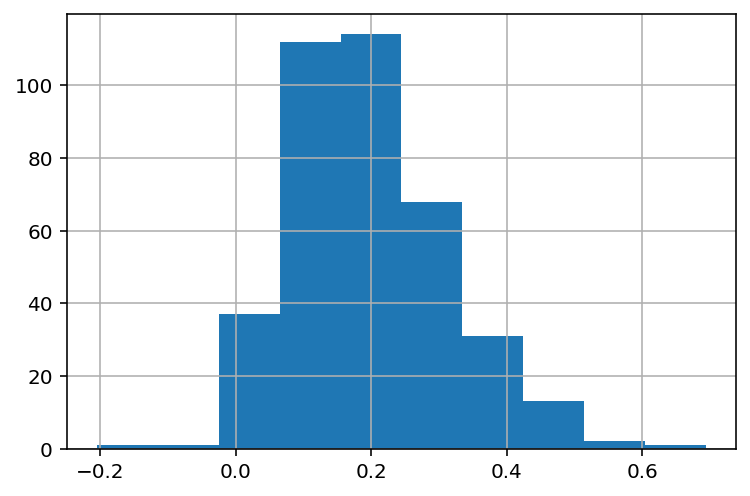

In [42]:
results['pct_difference'].hist()

In [30]:
metros.shape[0]

392

In [31]:
96/329

0.2917933130699088

In [33]:
charleston = get_acs(datasets, msa_fips='16620', years=2019)

/Users/knaaptime/mambaforge/envs/geosnap/lib/python3.9/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/Users/knaaptime/mambaforge/envs/geosnap/lib/python3.9/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 7
  Warn("Warning: setting k to %d" % k_q, UserWarning)


<AxesSubplot:>

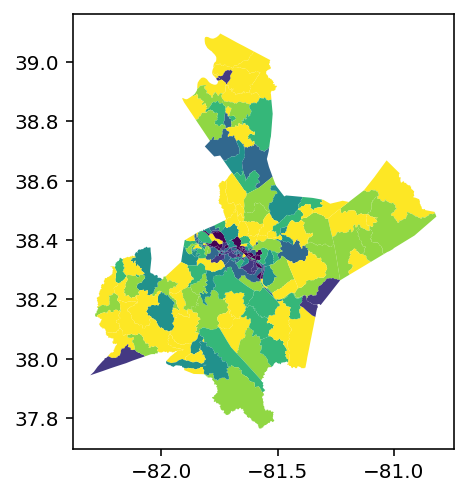

In [40]:
charleston.plot('p_nonhisp_white_persons', scheme='quantiles', k=8
               )

In [37]:
peoria = get_acs(datasets, msa_fips='37900', years=2019)

In [45]:
peoria.explore('p_nonhisp_white_persons', scheme='quantiles', k=8
               )

<AxesSubplot:>

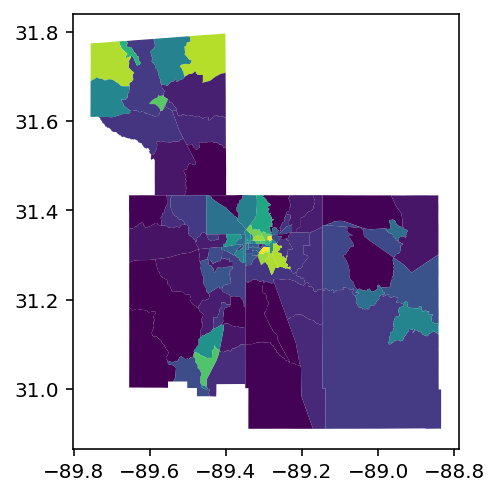

In [44]:
get_acs(datasets,msa_fips='25620',years=2019).plot('p_nonhisp_black_persons')